# Майнор по Анализу Данных, Группа ИАД-5
## Домашнее задание №3 
## Деревья решений, случайный лес

<hr\>
**Общая информация**

**Срок сдачи:** 07 июня 2017, 23:59 <br\>

При отправлении ДЗ на почту `hse.minor.dm+5@gmail.com` указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [ИАД-5] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>

Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Если вы используете код из общего доступа - просьба сопровождать комментариями и ссылками. В случае совпадения кода и отсутствия ссылок будет выставляться 0 за задание.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Classify leaf with random forest

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Помните [Iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)? Данные, с которыми вам предстоит работать в этом задании концептуально похожи на ирисы.

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

## Табличные данные

Загрузите файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [2]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [3]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [4]:
table_data.head(16)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.000000,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.000000,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
5,8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.000000,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.000000,0.000000,0.000000,0.001953,0.013672
6,10,Quercus_Canariensis,0.021484,0.031250,0.017578,0.009766,0.001953,0.042969,0.039062,0.000000,...,0.085938,0.000000,0.040039,0.000000,0.009766,0.000000,0.000000,0.000000,0.039062,0.003906
7,11,Quercus_Rubra,0.000000,0.000000,0.037109,0.050781,0.003906,0.000000,0.003906,0.000000,...,0.038086,0.025391,0.009766,0.002930,0.021484,0.000000,0.037109,0.006836,0.002930,0.036133
8,14,Quercus_Brantii,0.005859,0.001953,0.033203,0.015625,0.001953,0.000000,0.023438,0.000000,...,0.000000,0.000000,0.008789,0.000000,0.017578,0.000000,0.000000,0.000977,0.033203,0.074219
9,15,Salix_Fragilis,0.000000,0.000000,0.009766,0.037109,0.072266,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.070312,0.013672,0.192380,0.000000,0.074219,0.000000,0.000000


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить многомерный numpy массив

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
random_seed = 123

In [7]:
le=LabelEncoder()
species_encoded = le.fit_transform(table_data['species'])

Для записи в переменну X значения признаков margin, shape, texture, удалим из первоначальной таблицы признаки id и species и результат приравняем переменной X

In [8]:
X=np.array(table_data.drop(['id', 'species'], axis = 1))

In [9]:
species_encoded

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 36, 27, 94, 88,
       12, 28, 21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48,
       47, 64, 81, 83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,
        4, 84, 36, 35, 72, 60, 71, 72, 52, 50, 54, 11, 51, 18, 47,  5,  8,
       37, 97, 20, 33,  1, 59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54,
       93, 10, 46, 59, 84, 76, 15, 10, 15,  0, 69,  4, 51, 51, 94, 36, 39,
       62,  2, 24, 26, 35, 25, 87,  0, 55, 34, 38,  1, 45,  7, 93, 56, 38,
       21, 51, 75, 81, 74, 33, 20, 37,  9, 40, 60, 31, 83, 50, 71, 67, 30,
       66,  1, 43, 61, 23, 65, 84, 87, 46, 57, 16,  2, 28, 12, 96, 44, 76,
       29, 75, 41, 87, 67, 61, 30,  5, 12, 62,  3, 83, 81,  6, 85,  4, 37,
       57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40, 17, 51, 16, 42, 63, 86,
       37, 69, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,  9, 26, 44, 60, 13,
       14, 77, 13, 80, 87

* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь.

In [10]:
from sklearn.cross_validation import StratifiedShuffleSplit

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
#Способ разбиения взят отсюда http://www.programcreek.com/python/example/81852/sklearn.cross_validation.StratifiedShuffleSplit
#Сохраним еще id тестовой и контрольной выборки, так как они пригодятся в дальнейших задания
sss = StratifiedShuffleSplit(species_encoded, n_iter=1, test_size=0.2, random_state=123)
train_idx, test_idx = [s for s in sss][0]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = species_encoded[train_idx], species_encoded[test_idx]
id_train, id_test = table_data['id'][train_idx], table_data['id'][test_idx]

## Сравнение RF, DT и Bagging'а (2 балла)

На кросс-валидации по обучающей выборке сравните качество и скорость
1. Обычного дерева решений 
2. Bagging'a над деревьями решений с 10, 50, 100, 200 и 300 деревьями
3. Cлучайного леса с 10, 50, 100, 200 и 300 деревьями


* Изобразите полученные результаты на одном графике
* Используйте `StratifiedKFold` с 4 фолдами для оценки качества
* Мера качества - `accuracy`

In [12]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import time

In [13]:
skf = StratifiedKFold(y_train, n_folds = 4, random_state=123)

In [14]:
clf = DecisionTreeClassifier(random_state=123)

In [15]:
#Цикл для кросс-валидации взят из документации с помощью команды ?StratifiedKFold
#Идея с нахождением среднего времени и accuracy взята из прошлой домашки (ну и просто деление на 4 довольно очевидный шаг)
accuracy_score_clf = 0
total_time = 0
for train_index, test_index in skf:
    X_train_s, X_test_s = X_train[train_index], X_train[test_index]
    y_train_s, y_test_s = y_train[train_index], y_train[test_index]
    start_time = time.time()
    clf.fit(X_train_s, y_train_s)
    end_time = time.time()
    y_predicted_clf = clf.predict(X_test_s)
    total_time += end_time-start_time
    accuracy_score_clf += accuracy_score(y_test_s, y_predicted_clf)
print ('DecisionTreeClassifier:', accuracy_score_clf/4)
print ('Время обучения:', total_time/4)
    
    

DecisionTreeClassifier: 0.6174242424242424
Время обучения: 0.22043031454086304


In [17]:
#Цикл аналогичен циклу из ДЗ2, однако тут еще считаем время и также записываем в датафрейм
#Вывод в виде датафрейма, так как он лучше воспринимается на глаз
bgclf_scores=[]
ns = [10, 50, 100]
for n in ns:
    accuracy_score_bgclf = 0
    total_time = 0
    for train_index, test_index in skf:
        bgclf = BaggingClassifier(n_estimators=n, random_state=123)
        X_train_s, X_test_s = X_train[train_index], X_train[test_index]
        y_train_s, y_test_s = y_train[train_index], y_train[test_index]
        start_time = time.time()
        bgclf.fit(X_train_s, y_train_s)
        end_time = time.time()
        y_predicted_bgclf = bgclf.predict(X_test_s)
        total_time += end_time-start_time
        accuracy_score_bgclf += accuracy_score(y_test_s, y_predicted_bgclf)
    bgclf_scores.append((n, accuracy_score_bgclf/4, total_time/4))
bgclf_scores = pd.DataFrame(bgclf_scores).rename(columns ={0:'n',1:'accuracy', 2:'time'})
bgclf_scores    

,n,accuracy,time
0,10,0.777778,1.979329
1,50,0.907828,10.113771
2,100,0.925505,19.358779


In [18]:
rfclf_scores=[]
ns = [10, 50, 100]
for n in ns:
    accuracy_score_rfclf = 0
    total_time = 0
    for train_index, test_index in skf:
        rfclf = RandomForestClassifier(n_estimators=n, random_state=123)
        X_train_s, X_test_s = X_train[train_index], X_train[test_index]
        y_train_s, y_test_s = y_train[train_index], y_train[test_index]
        start_time = time.time()
        rfclf.fit(X_train_s, y_train_s)
        end_time = time.time()
        y_predicted_rfclf = rfclf.predict(X_test_s)
        total_time += end_time-start_time
        accuracy_score_rfclf += accuracy_score(y_test_s, y_predicted_rfclf)
    rfclf_scores.append((n, accuracy_score_rfclf/4, total_time/4))
rfclf_scores = pd.DataFrame(rfclf_scores).rename(columns ={0:'n',1:'accuracy', 2:'time'})
rfclf_scores

,n,accuracy,time
0,10,0.844697,0.114079
1,50,0.954545,0.611892
2,100,0.974747,1.165879


In [19]:
#Создадим два ряда чисел для того, чтобы можно было изобразить результаты на графиках
xplt = pd.DataFrame([accuracy_score_clf/4 for i in range (1,6)])
yplt = pd.DataFrame([10, 50, 100])
timeplt = pd.DataFrame([total_time/4 for i in range (1,6)])

In [20]:
#Преобразуем ряды чисел в датафрейм, чтобы привести их к виду, который аналогичен выводу в кросс-валидации для Bagging и RandomForest
xyplt = pd.DataFrame()
xyplt['n']=yplt[0]
xyplt ['accuracy'] = xplt[0]
xyplt['time'] = timeplt[0]

xyplt

,n,accuracy,time
0,10,0.617424,1.165879
1,50,0.617424,1.165879
2,100,0.617424,1.165879


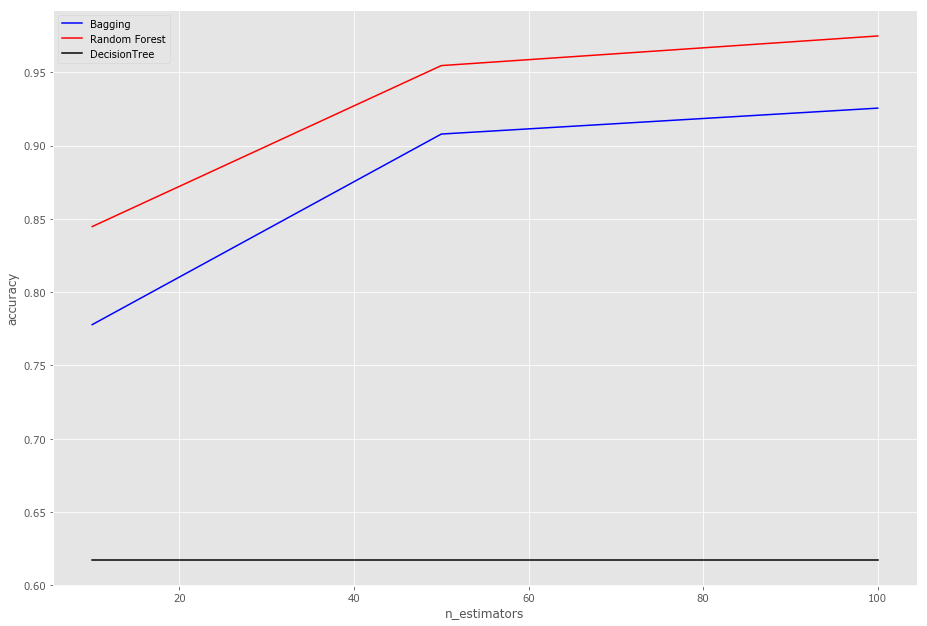

In [21]:
fig = plt.figure()
axes = fig.add_axes([0.0, 0.0, 1.0, 1.0])
axes.plot(bgclf_scores['n'], bgclf_scores['accuracy'], label = "Bagging", color = 'blue')
axes.plot(rfclf_scores['n'], rfclf_scores['accuracy'], label = 'Random Forest', color = "red")
axes.plot(xyplt['n'], xyplt['accuracy'], label = 'DecisionTree', color = 'black')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()

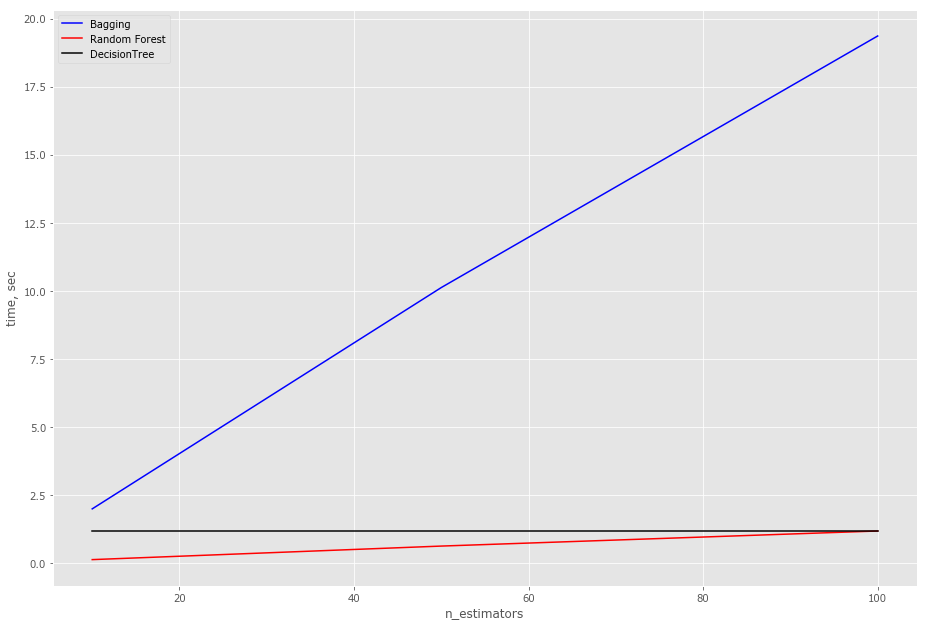

In [22]:
fig = plt.figure()
axes = fig.add_axes([0.0, 0.0, 1.0, 1.0])
axes.plot(bgclf_scores['n'], bgclf_scores['time'], label = "Bagging", color = 'blue')
axes.plot(rfclf_scores['n'], rfclf_scores['time'], label = 'Random Forest', color = 'Red')
axes.plot(xyplt['n'], xyplt['time'], label = 'DecisionTree', color = 'black')
plt.xlabel('n_estimators')
plt.ylabel('time, sec')
plt.legend()

Из графиков отчетливо видно, что Random Forest пока является лучшей моделью, так как показывает большее accuracy и меньшее время

# Изображения листьев

В папке `images` лежат 1584 изображения различного размера, названные в соответствии с id из файла `table_data.csv`.

In [22]:
#Первоначально random_seed был равен 228, так что изображение дополняло общую стилистику
filepath = os.path.join(IMG_DIR, '203.jpg')
img = plt.imread(filepath)

In [23]:
img.shape

(436, 482)

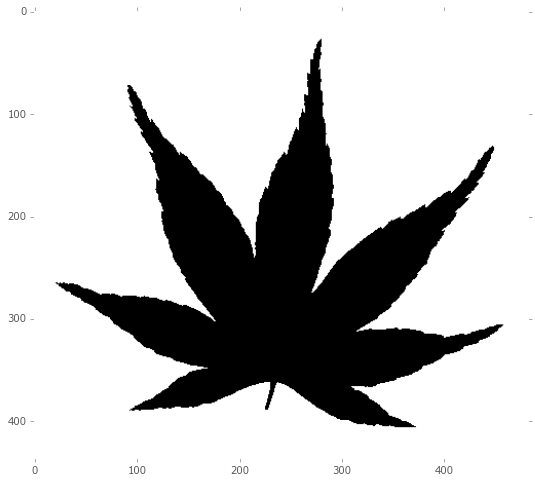

In [24]:
plt.imshow(img, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балла)

Необходимо
1. "Стандартизировать" размер изображений - сделать его одинаковым для всех
2. Отобрать изображения тех листьев, которые представлены в `table_data`

Пункт 1. можно сделать двумя способами:
* C помощью функции scipy.misc.imresize (неидеальный вариант)
* Найти максимальные длинну и ширину полотна и перенести исходные картинки в центр (кажется, что так лучше)

В результате этого задания вы должны получить получить массив изображений IMG_train и IMG_test для обучающей и контрольной выборки.

In [25]:
from scipy.misc import imresize

In [26]:
img_resized = imresize(img, (100, 100))

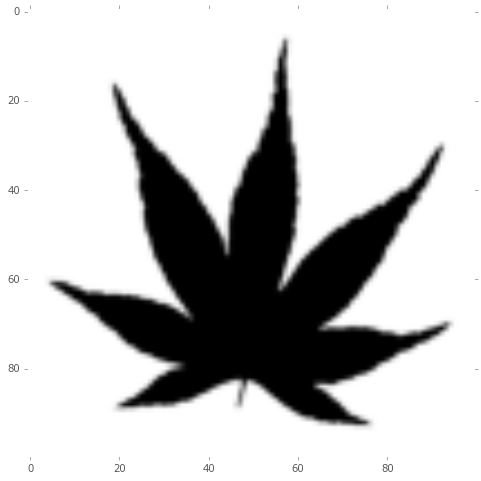

In [27]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

In [28]:
#Будем открывать каждое изображение по очереди, ресайзить и добавлять в пустой список
resized_images = []
for i in range(1, 1585):
    img = plt.imread(os.path.join(IMG_DIR, '%d.jpg'%i))
    img_resized = imresize(img, (100,100))
    resized_images.append(img_resized)
resized_images = np.array(resized_images)

In [29]:
#Добавим только те листы, id которых есть в исходной таблице table_data
IMG = []
for i in list(table_data['id']):
    IMG.append(resized_images[i-1])
IMG = np.array(IMG)

In [30]:
IMG_train, IMG_test = IMG[train_idx], IMG[test_idx]

In [31]:
IMG_test.shape

(198, 100, 100)

## TSNE (2 балла)

* Переформатируйте IMG_train и IMG_test к виду "матрица объект-признак" (команда reshape)
* На данных в X_train и IMG_train (по отдельности) изобразите результат применения T-SNE со следующими настройками: `n_components=2, perplexity=[5,10,20,30,50], method='exact', n_iter=5000, learning_rate=500`. 
* У вас должно получится 10 `scatter-plot` графиков с точками, расскашенными в цвет своего класса (для наглядности в `plt.scatter` укажите `cmap=plt.cm.Paired`)
* В каком случае (X_train или IMG_train) кластеры выделяются лучше? Как вы думаете, почему?


In [32]:
#Так как нам необходимо матрица объект-признак, то необходимо привести IMG_train и IMG_test к двумерному массиву
#Параметры для reshape взять из размерность IMG_train и IMG_test (вывод размерности был сделан выше)
from sklearn.manifold import TSNE
IMG_train_reshaped = IMG_train.reshape(792,10000)
IMG_test_reshaped = IMG_test.reshape (198, 10000)

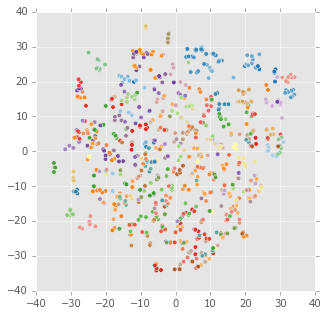

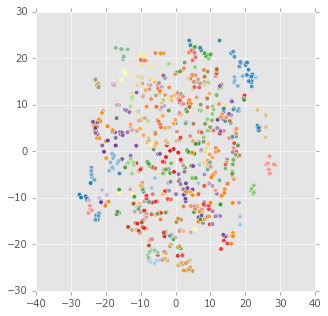

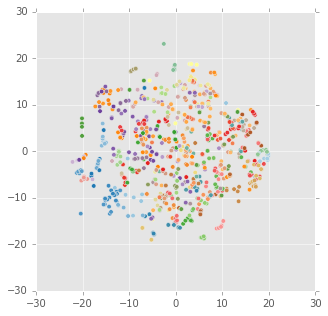

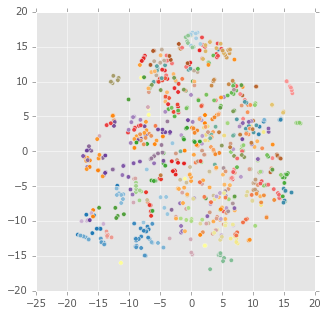

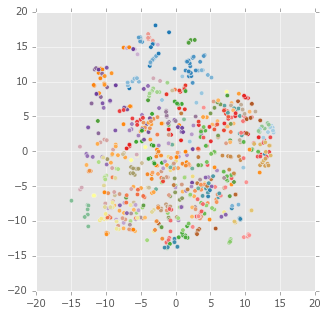

In [33]:
#Параметры для plt.scatter взяты из https://indico.io/blog/visualizing-with-t-sne/
a = [5, 10, 20, 30, 50]
for i in a:
    model = TSNE(n_components=2, perplexity=i, method='exact', n_iter=5000, learning_rate=500)
    result = model.fit_transform(IMG_train_reshaped)
    plt.figure(figsize=(5,5))
    plt.scatter(result[:,0], result[:,1], c=y_train, cmap= plt.cm.Paired )
    plt.show()

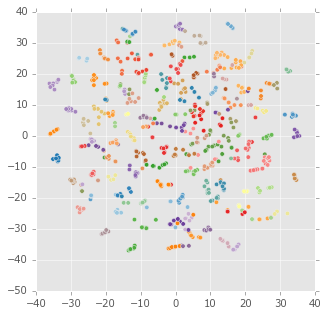

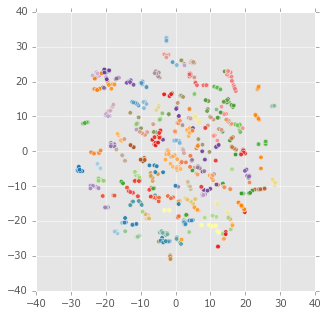

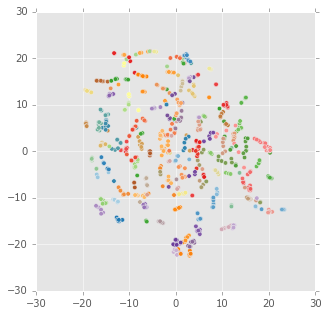

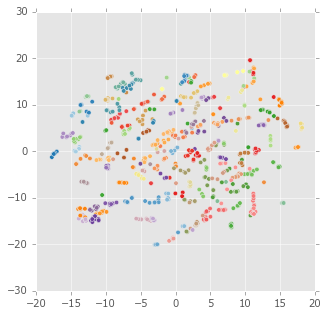

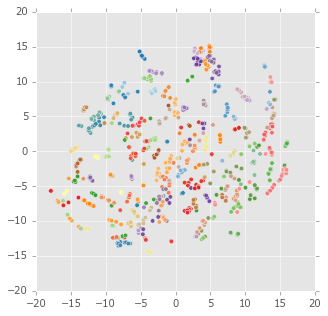

In [34]:
for i in [5, 10, 20, 30, 50]:
    model = TSNE(n_components=2, perplexity=i, method='exact', n_iter=5000, learning_rate=500)
    result = model.fit_transform(X_train)
    plt.figure(figsize=(5,5))
    plt.scatter(result[:,0], result[:,1], c=y_train, cmap= plt.cm.Paired )
    plt.show()

Заметим, что в случае X_train мы наблюдаем меньше "каши" на изображениях. Конкретные классы можно довольно отчетливо различить. Это означает, что в случае X_train кластеры выделяются лучше. Причиной может являться то, что признаки из таблицы несут в себе более точную информацию о параметрах листа, чем признаки, которые были основаны на картинках. Естественно, чем больше информации, тем более точно работает алгоритм. 

## PCA (1 балл)

* Используйте метод главных компонент, чтобы перейти к пространству меньшей размерности. Подберите количество компонент так, чтобы доля объясненной дисперсии составляла 60%
* Используя результаты МГК на кросс-валидации сравните качество
    1. Обычного дерева решений 
    2. Bagging'a над деревьями решений с 10, 50, 100, 200 и 300 деревьями
    3. Cлучайного леса с 10, 50, 100, 200 и 300 деревьями
    
#### Hint
Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) из PCA и предиктивной модели

In [35]:
from sklearn.decomposition import PCA

In [36]:
#Количество компонент подобрано вручную путем наблюдения за результатом
pca = PCA(n_components=12)
IMG_train_pca = pca.fit_transform(IMG_train_reshaped)
print('Доля объясненной дисперсии:', pca.explained_variance_ratio_.sum())

Доля объясненной дисперсии: 0.60129927715


In [37]:
#Повторим проделанное выше, но с данными после PCA
accuracy_score_clf_pca = 0
total_time_pca = 0
for train_index, test_index in skf:
    X_train_s, X_test_s = IMG_train_pca[train_index], IMG_train_pca[test_index]
    y_train_s, y_test_s = y_train[train_index], y_train[test_index]
    start_time = time.time()
    clf.fit(X_train_s, y_train_s)
    end_time = time.time()
    y_predicted_clf_pca = clf.predict(X_test_s)
    total_time_pca += end_time-start_time
    accuracy_score_clf_pca += accuracy_score(y_test_s, y_predicted_clf_pca)
print ('DecisionTreeClassifier:', accuracy_score_clf_pca/4)
print ('Время обучения:', total_time_pca/4)
    

DecisionTreeClassifier: 0.304292929293
Время обучения: 0.04465848207473755


In [38]:
bgclf_scores_pca=[]
ns = [10, 50, 100, 200, 300]
for n in ns:
    accuracy_score_bgclf_pca = 0
    total_time_pca = 0
    for train_index, test_index in skf:
        bgclf = BaggingClassifier(n_estimators=n, random_state=123)
        X_train_s, X_test_s = IMG_train_pca[train_index], IMG_train_pca[test_index]
        y_train_s, y_test_s = y_train[train_index], y_train[test_index]
        start_time = time.time()
        bgclf.fit(X_train_s, y_train_s)
        end_time = time.time()
        y_predicted_bgclf_pca = bgclf.predict(X_test_s)
        total_time_pca += end_time-start_time
        accuracy_score_bgclf_pca += accuracy_score(y_test_s, y_predicted_bgclf_pca)
    bgclf_scores_pca.append((n, accuracy_score_bgclf_pca/4, total_time_pca/4))
bgclf_scores_pca = pd.DataFrame(bgclf_scores_pca).rename(columns ={0:'n',1:'accuracy', 2:'time'})
bgclf_scores_pca

,n,accuracy,time
0,10,0.391414,0.212285
1,50,0.450758,1.054726
2,100,0.467172,2.096521
3,200,0.479798,4.287493
4,300,0.479798,6.557028


In [39]:
rfclf_scores_pca=[]
ns = [10, 50, 100, 200, 300]
for n in ns:
    accuracy_score_rfclf_pca = 0
    total_time_pca = 0
    for train_index, test_index in skf:
        rfclf = RandomForestClassifier(n_estimators=n, random_state=123)
        X_train_s, X_test_s = IMG_train_pca[train_index], IMG_train_pca[test_index]
        y_train_s, y_test_s = y_train[train_index], y_train[test_index]
        start_time = time.time()
        rfclf.fit(X_train_s, y_train_s)
        end_time = time.time()
        y_predicted_rfclf_pca = rfclf.predict(X_test_s)
        total_time_pca += end_time-start_time
        accuracy_score_rfclf_pca += accuracy_score(y_test_s, y_predicted_rfclf_pca)
    rfclf_scores_pca.append((n, accuracy_score_rfclf_pca/4, total_time_pca/4))
rfclf_scores_pca = pd.DataFrame(rfclf_scores_pca).rename(columns ={0:'n',1:'accuracy', 2:'time'})
rfclf_scores_pca

,n,accuracy,time
0,10,0.396465,0.066726
1,50,0.472222,0.323309
2,100,0.486111,0.766011
3,200,0.505051,1.633145
4,300,0.502525,2.628190


Для сравнения качества построим график n_estimators - accuracy

In [40]:
xplt_pca = pd.DataFrame([accuracy_score_clf_pca/4 for i in range (1,6)])
yplt_pca = pd.DataFrame([10, 50, 100, 200, 300])
timeplt_pca = pd.DataFrame([total_time_pca/4 for i in range (1,6)])

In [41]:
xyplt_pca = pd.DataFrame()
xyplt_pca['n']=yplt_pca[0]
xyplt_pca ['accuracy'] = xplt_pca[0]
xyplt_pca['time'] = timeplt_pca[0]

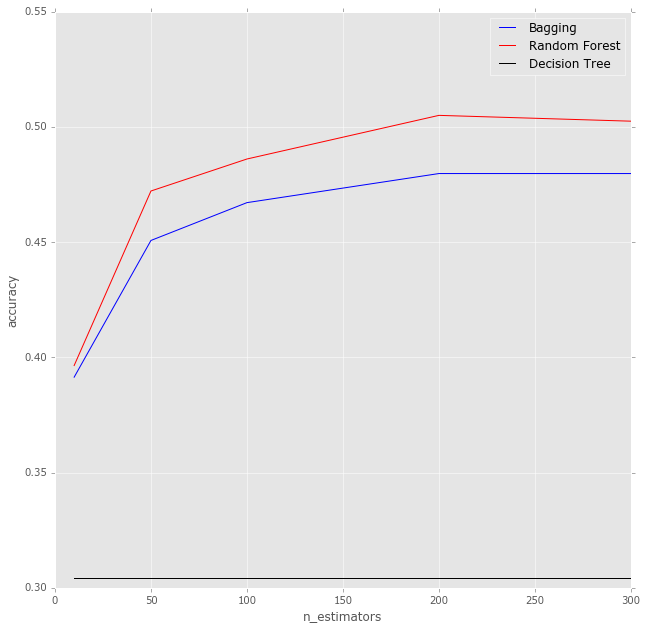

In [42]:
fig = plt.figure(figsize=(8,8))
axes = fig.add_axes([0.0, 0.0, 1.0, 1.0])
axes.plot(bgclf_scores_pca['n'], bgclf_scores_pca['accuracy'], label = "Bagging", color = 'blue')
axes.plot(rfclf_scores_pca['n'], rfclf_scores_pca['accuracy'], label = 'Random Forest', color = "red")
axes.plot(xyplt_pca['n'], xyplt_pca['accuracy'], label = 'Decision Tree', color = 'black')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()

Получим, что Random Forest является наилучшей моделью, однако, accuracy на выборке из картинок значительное ниже, чем на табличных данных

# Подбор гиперпараметров модели на табличных данных (2 балла)

С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса

* Используйте `StratifiedKFold` на 4х фолдах
* Мера качества - `accuracy`

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [44]:
#Идея реализации GridSearch взята из ДЗ1, параметры для классификатора взяты из документации с помощью команды ?RandomForestClassifier
param_grid = {'n_estimators':[10, 50, 100, 200, 300], 'max_depth':[3,5,10,None], 'max_features':[30, 'sqrt', 'log2']}
gridsearch = GridSearchCV(RandomForestClassifier(random_state=123), param_grid, scoring = 'accuracy', cv = skf)

In [46]:
%%time
fit = gridsearch.fit(X_train, y_train)#Посчитаем время обучения GridSearch ради любопытства

Wall time: 6min 4s


In [47]:
#Выведем результаты в виде датафрейма, чтобы было красиво
best_score = gridsearch.best_score_
bp = gridsearch.best_params_
print("Best accuracy:", best_score)
bpdf = pd.DataFrame.from_dict(bp, orient='index').rename(columns ={0:'Значение параметра'})
bpdf

Best accuracy: 0.981060606061


,Значение параметра
max_features,sqrt
n_estimators,200
max_depth,None


# Проверка на контрольной выборке (1 балл)

* Примените оптимальную модель на контрольной выборке
* Для нескольких случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса

In [48]:
rfclf_best = RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=None, random_state=123 )
rfclf_best.fit(X_train, y_train)
y_predicted_best = rfclf_best.predict(X_test)
accuracy_table = accuracy_score(y_test, y_predicted_best)
print("Best accuracy:", accuracy_table )

Best accuracy: 0.959595959596


In [49]:
#Так как id в id_test записаны с индексами из первоначальной таблицы, переиндексируем этот датафрейм для дальнейшей работы
test_id_df = pd.DataFrame(id_test)
id_test_reindexed = pd.DataFrame([i for i in test_id_df['id']])

In [50]:
#Создадим датафрейм из нескольких массивов. 
#Predicted - класс, предсказанный нашей моделью, Real - класс, который записан в переменной y_test, id - идентификатор
y_pred_df = pd.DataFrame(y_predicted_best)
y_test_df = pd.DataFrame(y_test)
y_pred_df[1] = y_test_df
y_pred_df[2] = id_test_reindexed
y_pred_df = y_pred_df.rename(columns = {0:'predicted', 1:'real', 2:'id'})
y_pred_df.head(5)

,predicted,real,id
0,7,7,1117
1,59,59,576
2,4,4,27
3,39,39,214
4,0,0,498


In [51]:
#Чтобы определить, какие предсказания были неверными, сравним значения в столбцах real и predicted
#Запишем индексы ошибок в отдельный массив
wrong_predictions = []
for i in range (len(y_test)):
    if y_pred_df['predicted'][i] != y_pred_df['real'][i]:
        wrong_predictions.append(i)
wrong_predictions

[67, 76, 107, 110, 112, 121, 139, 161]

In [52]:
#Для поиска id листа с классом, который был неправильно предсказан для того или иного объекта воспользуемся циклом
for i in range (len(species_encoded)):
    if species_encoded[i] == y_pred_df['predicted'][107]: #если мы находим значения класса в массиве species_encoded, то мы запоминаем его индекс, чтобы потом вытащить id этого объекта
        break 
for k in range (len(species_encoded)):
    if species_encoded[k] == y_pred_df['predicted'][110]:
        break

In [53]:
filepath1 = os.path.join(IMG_DIR, '%d.jpg'%y_pred_df['id'][107])
filepath2 = os.path.join(IMG_DIR, '%d.jpg'%table_data['id'][i])
filepath3 = os.path.join(IMG_DIR, '%d.jpg'%y_pred_df['id'][110])
filepath4 = os.path.join(IMG_DIR, '%d.jpg'%table_data['id'][k])
img1 = plt.imread(filepath1)
img2 = plt.imread(filepath2)
img3 = plt.imread(filepath3)
img4 = plt.imread(filepath4)

Слева: истинное изображение листа. Справа: Предсказанное изображение листа


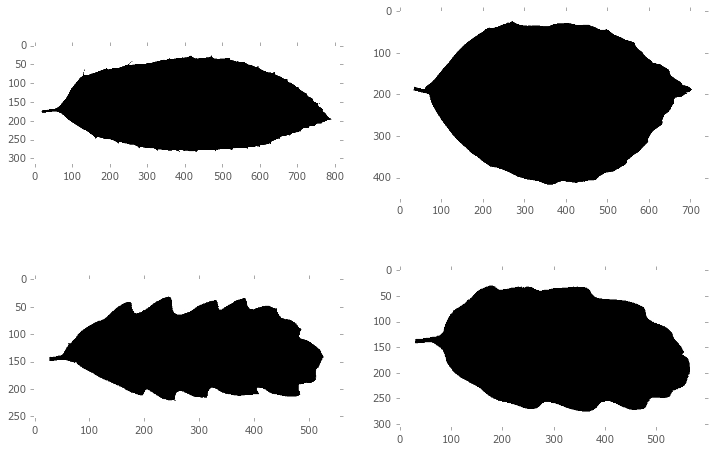

In [54]:
#https://matplotlib.org/examples/pylab_examples/subplots_demo.html реализация subplot
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
print("Слева: истинное изображение листа. Справа: Предсказанное изображение листа")
ax1.imshow(img1, cmap='Greys')
ax1.grid(None)
ax2.imshow(img2, cmap='Greys')
ax2.grid(None)
ax3.imshow(img3, cmap='Greys')
ax3.grid(None)
ax4.imshow(img4, cmap='Greys')
ax4.grid(None)

# Подбор гиперпараметров модели на объединенных данных (2 балла) **

За это задание можно получить 2 дополнительных балла, но сделать его надо безукоризненно =)

Сейчас мы попробуем использовать данные с изображений и табличные данные, которые затем пойдут на вход случайному лесу. Далее надо будет подобрать оптимальные гиперпараметры случайного леса с помощью кросс-валидации

## Объединяем данные

* Составьте матрицу A_train (A_test) как результаты конкатенации матриц X_train и IMG_train (X_test и IMG_test)

In [55]:
#Используем hstack https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html
A_train = pd.DataFrame(np.hstack((X_train, IMG_train_reshaped)))
A_test = pd.DataFrame(np.hstack((X_test, IMG_test_reshaped)))

In [56]:
print(A_train.shape, A_test.shape) #проверим размерности матриц

(792, 10192) (198, 10192)


In [57]:
A_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,10182,10183,10184,10185,10186,10187,10188,10189,10190,10191
0,0.023438,0.029297,0.007812,0.044922,0.009766,0.029297,0.035156,0.0,0.005859,0.025391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.015625,0.089844,0.054688,0.005859,0.000000,0.105470,0.003906,0.0,0.001953,0.007812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001953,0.000000,0.039062,0.046875,0.013672,0.000000,0.000000,0.0,0.042969,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005859,0.007812,0.074219,0.029297,0.013672,0.005859,0.027344,0.0,0.011719,0.023438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.027344,0.054688,0.048828,0.013672,0.011719,0.042969,0.007812,0.0,0.011719,0.027344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Составим  Pipeline

Наш Pipeline условно изображен на рисунке ниже:

<center><img src='scheme.png'></center>


Из объединенных данных в матрице `А` 
1. Выбираются столбцы, которые относятся к изображению и передаются в `PCA`
2. Исходные табличные данные отделяются от всех остальных, но остаются без изменений
3. Результаты пунктов 1 и 2 объединяются
4. И передаются на вход в случайный лес

В результате в переменную model вы должны записать весь Pipeline из шагов 1-4

#### Hints
* Для того, чтобы выбирать столбцы из матрицы `А` можно использовать `FunctionTransformer` (см. пример ниже)
* Для того, чтобы объединять результаты преобразований можно использовать [`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html)

In [58]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

In [59]:
def select_col_idx(X, col_idx=[1]):
    return X[:, col_idx]

In [60]:
#Базовые идеи построения pipeline были взяты с https://www.youtube.com/watch?v=7l_WQO3JbWE&feature=youtu.be
#Реализация и код pipeline были основаны на примерах http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
IMG_part = FunctionTransformer(select_col_idx, kw_args={'col_idx': np.array([i for i in range (0,10000)])}) #Первый шаг, выбираем столбцы
pipe = Pipeline([('IMG', IMG_part), ('PCA', pca)]) #Применяем к выбранным столбцам PCA
X_part = FunctionTransformer(select_col_idx, kw_args={'col_idx': np.array([i for i in range (0,192)])}) #Второй шаг, выбираем столбцы из первоначальной таблицы
featured = FeatureUnion([('IMG after pca', pipe), ('X part', X_part)]) #Третий шаг, объединяем результаты первых двух

In [61]:
model = Pipeline([('Featured data', featured), ('RFC', RandomForestClassifier(random_state = 123))])#Передаем объединенные результаты в случайный лес

In [62]:
#Для поиска наилучшей модели воспользуемся гридсерчем
param_grid_pipeline = {'RFC__n_estimators':[10, 50, 100, 200, 300], 'RFC__max_depth':[3,5,10,None], 'RFC__max_features':[30, 'sqrt', 'log2']}
gridsearch_pipeline = GridSearchCV(model, param_grid_pipeline, scoring = 'accuracy', cv = skf)

In [63]:
%%time
fit_featured = gridsearch_pipeline.fit(A_train, y_train)

Wall time: 9min 40s


In [64]:
accuracy_featured = gridsearch_pipeline.best_score_
print(accuracy_featured)
bp_featured = gridsearch_pipeline.best_params_
bpdf_featured = pd.DataFrame.from_dict(bp_featured, orient='index').rename(columns ={0:'Значение параметра'})
bpdf_featured

0.982323232323


,Значение параметра
RFC__n_estimators,300
RFC__max_depth,None
RFC__max_features,sqrt


## Проверка на контрольной выборке

* Примените оптимальную модель на контрольной выборке
* Сравните качество с моделью на табличных данных

In [68]:
#http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html обучение модели взято из примера
pipeline_model = model.set_params(RFC__max_depth = None, RFC__max_features = 'sqrt', RFC__n_estimators = 300).fit(A_train, y_train)

In [69]:
y_test_predicted_pipeline = model.predict(A_test)
accuracy_pipeline = accuracy_score(y_test, y_test_predicted_pipeline)
print(accuracy_pipeline)

0.974747474747


In [70]:
print("Accuracy на объединенных данных:", accuracy_pipeline)
print("Accuracy на табличных данных:", accuracy_table)

Accuracy на объединенных данных: 0.974747474747
Accuracy на табличных данных: 0.959595959596


# Вывод
Модель на объединенных данных работает лучше, так как ее accuracy больше